In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




In [2]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [3]:
data = pd.concat([train, test], axis=0)
data_labels = data['label']
data_labels = data_labels.values.tolist()
del data['label']

In [4]:
map(int,data_labels)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [6]:
principalDf['label'] = data_labels

In [10]:
principalDf

,principal component 1,principal component 2,label
0,122.258007,-316.232673,5
1,1010.490077,-289.965116,0
2,-58.998969,393.703528,4
3,-796.959840,-607.417806,1
4,-391.323347,729.797806,9
5,185.962988,223.858719,2
6,-730.489523,-161.999682,1
7,503.483771,-308.730713,3
8,-874.558670,-84.301199,1
9,-304.012483,463.570944,4


In [7]:
train, test = train_test_split(principalDf, test_size=0.2)

In [8]:
train_x = train["label"]
test_x = test["label"]

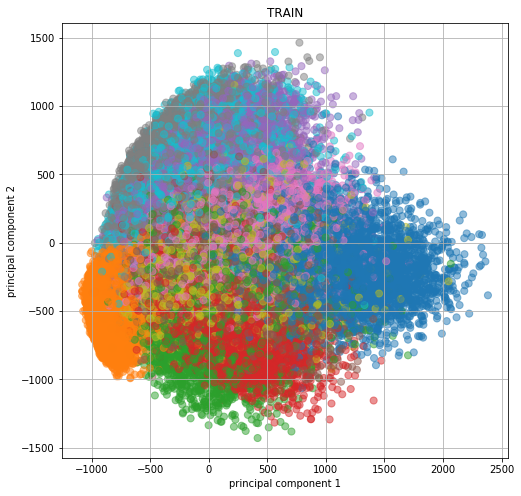

In [19]:
c = []
for i in train.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



plt = train.plot.scatter(x = "principal component 1", y="principal component 2", 
                        c = c, s = 50, alpha = 0.5,figsize = (8,8),grid = True,title="TRAIN")


In [16]:
c = []
for i in test.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



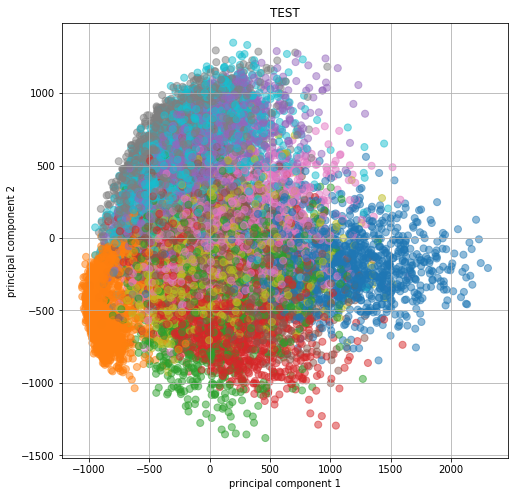

In [18]:
plt = test.plot.scatter(x = "principal component 1", y="principal component 2", 
                        c = c, s = 50, alpha = 0.5,figsize = (8,8),grid = True,title="TEST")


In [20]:
from sklearn.svm import SVC
del train["label"]
clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
res = test["label"]
del test["label"]
a = clf.predict(test)
len(a)

14000

In [22]:
a

array([6, 0, 1, ..., 1, 6, 7])

In [23]:

test["pred"] = a
test["Results"] = res

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


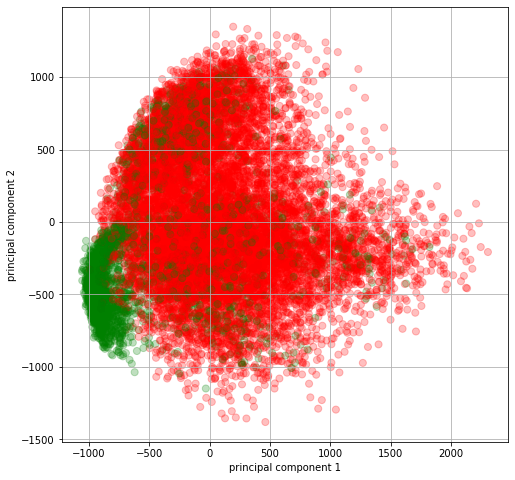

In [28]:
test["color"] = test["Results"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')
plt = test.plot.scatter(x = "principal component 1", y="principal component 2", c = c, s = 50, alpha = 0.25,figsize = (8,8),grid = True)



In [49]:
test

,principal component 1,principal component 2,pred,Results,color
16435,204.670475,-48.209056,6,3,False
17229,612.418926,152.822439,0,6,False
34169,-698.184778,-517.824163,1,1,True
67520,-250.583666,785.814116,4,4,True
10027,-729.364197,-685.264360,1,1,True
31603,-179.889332,-552.385987,1,2,False
53655,-327.439340,687.248907,4,4,True
21134,-1.874401,-134.368808,1,4,False
65462,139.532908,68.530830,6,8,False
53761,-940.740921,-614.885887,1,1,True


In [29]:
#Grid size for test

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

In [30]:
max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

In [31]:
min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

In [32]:
min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

In [33]:
x_axis = round((max_1 - min_1)/10)

In [34]:
y_axis = round((max_2-min_2)/10)

In [35]:
x_axis = x_axis.as_integer_ratio()[0]

In [36]:
y_axis = y_axis.as_integer_ratio()[0]

In [37]:
x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [38]:
x_l

[-1058.0,
 -722.0,
 -386.0,
 -50.0,
 286.0,
 622.0,
 958.0,
 1294.0,
 1630.0,
 1966.0,
 2302.0]

In [39]:
y_l

[-1381.0,
 -1108.0,
 -835.0,
 -562.0,
 -289.0,
 -16.0,
 257.0,
 530.0,
 803.0,
 1076.0,
 1349.0]

In [40]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1'])
    maxx = max(data['principal component 1']) + 1
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
    if(x_l[len(x_l)-1] != maxx):
        x_l.append(maxx)
        
        
    miny = min(data['principal component 2'])
    maxy = max(data['principal component 2'])
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    if(y_l[len(y_l)-1] != maxy):
        y_l.append(maxy)
    
    return x_l,y_l
        

In [41]:
def inWindow(x1,x2,a,i):
    """
    check if value falls in parzen window
    """
    if ((a[i] <= x2) and (a[i] > x1)):
        return True
    return False

        

In [42]:
def genDensity(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    for r in data.values:
        totx = 0
        toty = 0
        for i in range(0,len(x_l)-1):
            totx = inWindow(x_l[i],x_l[i+1],r,0)
            if totx == True:
                xval = x_l[i+1]
                break
        for j in range(0,len(y_l)-1):
            toty = inWindow(y_l[j],y_l[j+1],r,1)
            if toty == True:
                yval = y_l[j+1]
                break
        if r[4] == True:
            acc = 1
        else:
            acc = 0
        densityMap.append([xval,yval,1, acc])
    
    densityMapF = pd.DataFrame(data=densityMap, columns=['x2','y2','density percentage','accuracy'])


    densityMapF = densityMapF.groupby(['x2','y2']).sum()


    densityMapF.reset_index(inplace=True)

    densityMapF['accuracy'] = densityMapF['accuracy']*100.0/densityMapF['density percentage']
    densityMapF['density percentage'] = densityMapF['density percentage']*100.0/len(data)
    
    return densityMapF
            
            
    

In [43]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [67]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds,average='micro')
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds, average='micro')
                prec = precision_score(results,preds, average='micro')
                densityMap.append([x_l[x+1],y_l[y+1],density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x','y','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [68]:
x_l

[-1058.0,
 -722.0,
 -386.0,
 -50.0,
 286.0,
 622.0,
 958.0,
 1294.0,
 1630.0,
 1966.0,
 2302.0]

In [69]:
y_l

[-1381.0,
 -1108.0,
 -835.0,
 -562.0,
 -289.0,
 -16.0,
 257.0,
 530.0,
 803.0,
 1076.0,
 1349.0]

In [70]:
x_l_1, y_l_1 = genXY(100,test)

34
27


In [71]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

In [73]:
densityMap.sort_values(by=['accuracy score'],ascending=False)

,x,y,density,accuracy score,f1 score,recall score,precision score
0,-857.588875,-780.618402,0.001714,1.000000,1.000000,1.000000,1.000000
1,-857.588875,-680.618402,0.004929,1.000000,1.000000,1.000000,1.000000
41,-557.588875,-980.618402,0.000071,1.000000,1.000000,1.000000,1.000000
42,-557.588875,-880.618402,0.000143,1.000000,1.000000,1.000000,1.000000
14,-757.588875,-580.618402,0.003571,1.000000,1.000000,1.000000,1.000000
26,-657.588875,-780.618402,0.001000,1.000000,1.000000,1.000000,1.000000
12,-757.588875,-780.618402,0.001143,1.000000,1.000000,1.000000,1.000000
11,-757.588875,-880.618402,0.000214,1.000000,1.000000,1.000000,1.000000
13,-757.588875,-680.618402,0.002571,1.000000,1.000000,1.000000,1.000000
25,-657.588875,-880.618402,0.000571,1.000000,1.000000,1.000000,1.000000
